## Predicting Heart Disease Using Machine Learning

This notebook looks into various `python based machine-learning and data science libraries` in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

we're going to take the following approach:
1. Problem definition.
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition
> we are going to predict whether someone has `heart-disease` or not. by giving the clinical data of a patient.

## 2. Data 
> i get the open source data from UCI machine learning repository.
and this is also availible on kaggle.

## 3. Evaluation
> if we reach 95% of accuracy at predicting whether or not a patient has heart disease during proof of concept, we will end the project.

## 4. Features

**Data Dictionary**
1. age, age in years
2. sex(1 = male; 0 = female)
3. cp, chest pain type
    * Typical angina: Chest pain related decrease blood supply to the heart
    * Atypical angina: Chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart realted)
    * Asymptomatic: Chest pain not showing sign of disease
4. trestbps, resting blood pressure (in mm Hg on admission to the hospital). anything above 130-140 is typically cause for concern
5. chol, serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern   
6. fbs, (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    * `>126`mg/dL signals diabetes
7. restecg, resting electrocardiographic results
    * 0. Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach, maximum heart rate achieved
9. exang, exercise induced angina (1 = yes; 0 = no)
10. oldpeak, ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Prepairing the Tools
we're going to use pandas , Matplotlib and Numpy for data analysis and data manipulation

In [1]:
# importing data analysis and ploting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv('11.3 heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaN
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaN
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaN
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaN


In [3]:
df.shape # Rows and Columns

(303, 15)

## Data Exploration

**Find out more about the data here**
* What questions are you trying to solv?
* What kind of data do we have and how do we treat different types?
* What's missing in our data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, Change and remove features to get more out of your data?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaN
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaN
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaN
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaN


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,NaN
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,NaN
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,NaN
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,NaN
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,NaN


In [6]:
df.shape

(303, 15)

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
165 + 138

303

In [9]:
df.target.isna().sum()

0

there are 165 values/rows of `1 (yes)` and 138 values/rows of `0 (NO)` in target column and there is no missing values in target column

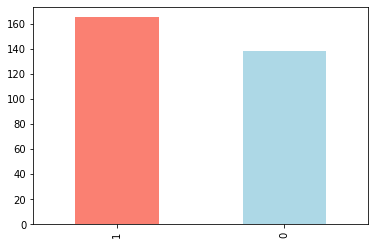

In [10]:
df.target.value_counts().plot.bar(color=['salmon', 'lightblue']);

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Unnamed: 14'],
      dtype='object')

In [12]:
# let's remove Unnamed column

df = df.drop('Unnamed: 14', axis=1)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Are there any missing values?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
## Comparing sex column to the target column

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


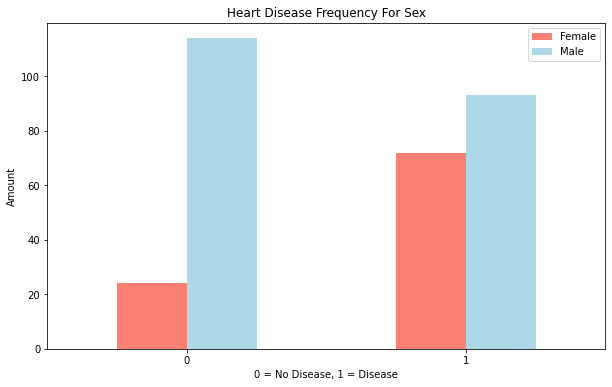

In [19]:
pd.crosstab(df.target, df.sex).plot.bar(figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency For Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [20]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

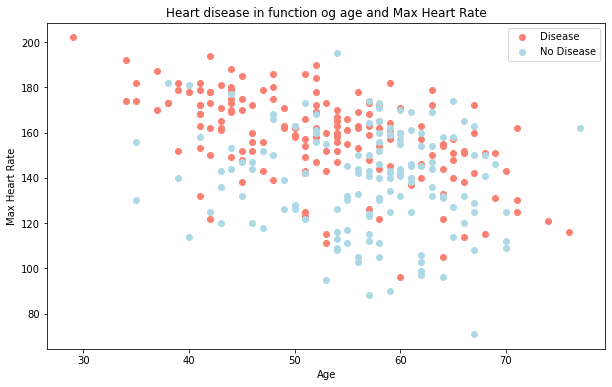

In [21]:
plt.figure(figsize=(10,6))

# Scatter with Positive Examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='salmon');

# Scatter with Negative Examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='lightblue');

plt.title('Heart disease in function og age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

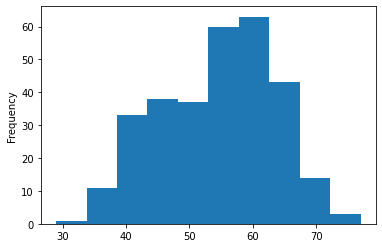

In [22]:
# check the distribution of age column with histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp, chest pain type
    * Typical angina: Chest pain related decrease blood supply to the heart
    * Atypical angina: Chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart realted)
    * Asymptomatic: Chest pain not showing sign of disease

In [23]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


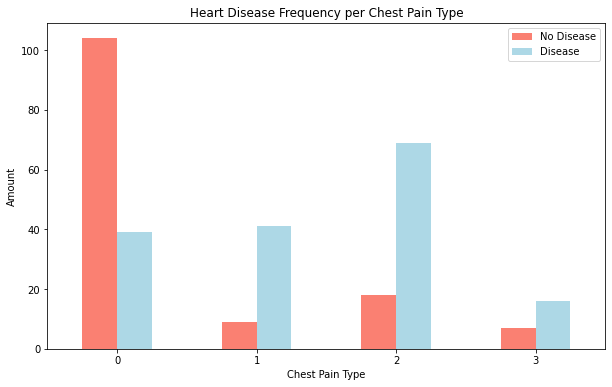

In [24]:
# Make cp and target column visual
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10,6), color=['salmon', 'lightblue']);

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

In [25]:
# Make a correlation metrics
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


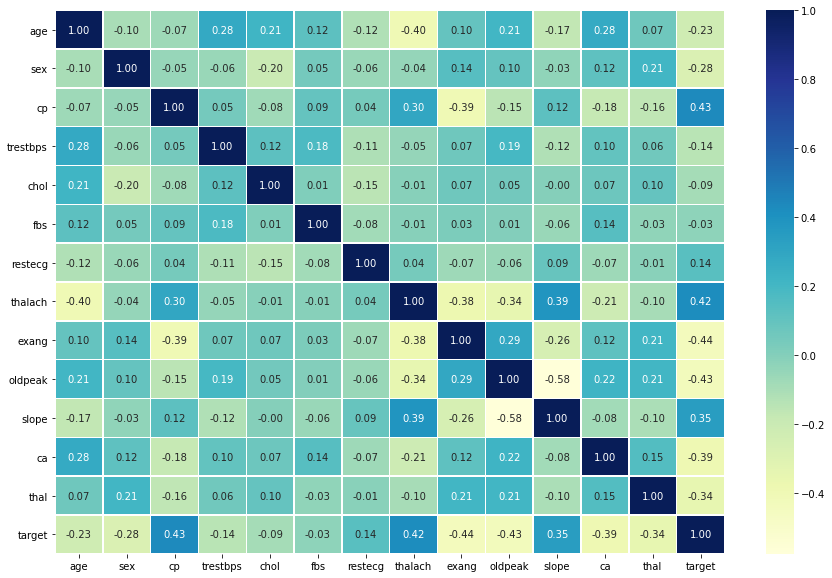

In [26]:
# let's make our correlation metrics more clear
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_corr,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');


## Modeling

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# Split data into X and Y

X = df.drop('target', axis=1)

y = df['target']

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
# Split data into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [33]:
len(X_train), len(y_train)

(242, 242)

We split our data into train and test sets. it's time to train our Machine learning model.

we will train it (find patterns) on the training sets.

And we will test it (use the patterns) on the test sets to predict.

**We will try different machine learning models**

**1 Logistic Regression**

In [34]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate machine learning models.
    models: a dictionary of different machine learning models.
    X_train: Training Data (No Labels)
    X_test: Testing data (No labels)
    y_train : Training labels
    y_test: Testing labels
    '''
    # random seed
    np.random.seed(42)
    # Make dictionary to keep models scores
    models_score = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to models_score dictionary
        models_score[name] = model.score(X_test, y_test)
        
    return models_score    

In [35]:
models_score = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
models_score

C:\Users\hp\Desktop\Data_Science_Project\Heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

In [36]:
model_compare = pd.DataFrame(models_score, index=['Accuracy'])
model_compare.head()

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


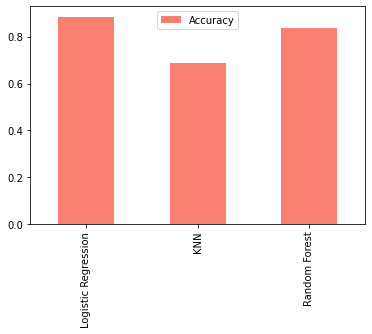

In [37]:
model_compare.T.plot.bar(color=['salmon']);

Now we have got a baseline model. and we know a model's first predictions aren't always what we should based our next steps off.
what should do?

let's look the following:
* Hyperparameter tuning
* Feature importance
* Confusion metrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hands)

In [38]:
# Let's tune KNN
train_score = []
test_score = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithem
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_score.append(knn.score(X_test, y_test))

In [39]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [40]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


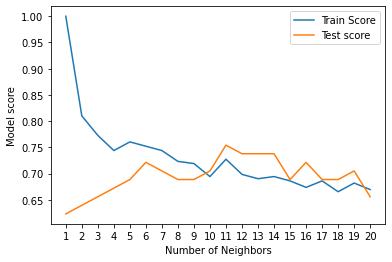

In [41]:
plt.plot(neighbors, train_score, label='Train Score')
plt.plot(neighbors, test_score, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_score)*100:.2f}%')

 ### Hyperparameter Tuning with RandomizedSearchCV
 
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

... Using RandomizedSearchCV

In [42]:
# Hyperperameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver': ['liblinear']}

# hyperperameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

hyperperameter grid has been set for each of our models. let's tune them using RandomizedSearchCV

In [43]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting random hyperperameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

We tune LogisticRegression(). But the result is still same.

Now we are going to tune RandomForestClassifier()

In [46]:
np.random.seed(42)

# setup random hyperperamter search for RandomForestClassifier
rs_rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)

# Fitting random hyperparameter search model for RadomForestCassifier()
rs_rf_grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
# Find the best hyperparameters
rs_rf_grid.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [48]:
# Evaluate the Model
rs_rf_grid.score(X_test, y_test)

0.8688524590163934

1. By hands
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter Tuning with GridSearchCV

LogisticRegression model still provide score best now we will try to improve and tune logisticregression model with GridSearchCV

In [49]:
# Different hyperparameter for our logisticregression model
log_reg_grid = {'C':np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

gs_log_grid = GridSearchCV(LogisticRegression(),
                            param_grid=log_reg_grid,
                            cv=5,
                            verbose=True)

# Fit the hyperparameter search model
gs_log_grid.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


In [50]:
# Check the best model
gs_log_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
gs_log_grid.score(X_test, y_test)

0.8852459016393442

## Evaluate our tuned machine learning model classifier , beyond accuracy

* RUC curve and AUC score
* Confusion metrix
* Classification report
* Precision
* Recall
* F1-score

...and cross-validation if possible.

In [52]:
# Make prediction with tuned model
y_preds = gs_log_grid.predict(X_test)

In [53]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

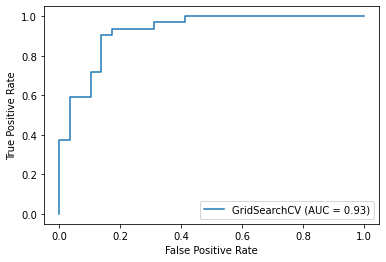

In [55]:
# Plot RUC curve and calculate and calculate AUC cruve
plot_roc_curve(gs_log_grid, X_test, y_test)

In [56]:
# Confusion metrics
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


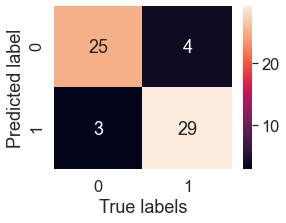

In [62]:
sns.set(font_scale=1.5)

def plot_conf_met(y_test, y_preds):
    '''
    ploting confusion metrix with seaborn
    '''
    fig, ax = plt.subplots(figsize=(4,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar= True)
    
    plt.xlabel('True labels')
    plt.ylabel('Predicted label')
    
plot_conf_met(y_test, y_preds)

Now we got ROC curve, AUC metrix and confusion metrix, let's get a classification report as well as cross-validation, precision, recall and F1-score.

In [63]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metrics using cross-validation

we will now calculate precision, recall and F1-score of our model using cross validation and for that we will use `cross_val_score()`.

In [64]:
# checking best hyperparameters
gs_log_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [73]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver= 'liblinear')

In [74]:
# Cross_validated accuracy
cv_acc = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [75]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [77]:
# cross validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [79]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [80]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [82]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [83]:
# cross validated F1-score
cv_f1 = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [85]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [87]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


<AxesSubplot:title={'center':'Cross-validation Classification Metrics'}>

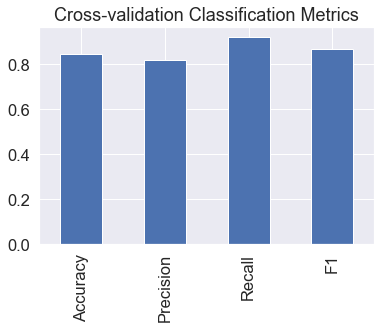

In [88]:
cv_metrics.T.plot.bar(title='Cross-validation Classification Metrics',
                      legend=False)